#  Embedding, Clustering and Retrieval
This project has been a collaborative work between **Tarush Shankar(UID:1647043)** and **Boyong Wang(UID:1468377)**.

In this project, we will explore document similarity and clustering using pre-trained transformer models and visualization techniques. We will use the `SentenceTransformer` library to generate document embeddings and calculate pairwise cosine similarities between documents. We will also perform k-means clustering on the document embeddings and visualize the clusters using matplotlib. Lastly, we will implement a function to retrieve the top k most similar documents based on a given query.

- **Embedding:** Understand how textual information is transformed into numerical vectors that machines can work with.
- **Clustering:** Discover how similar documents can be grouped together automatically.
- **Retrieval:** Learn how to retrieve relevant documents based on a query, using the knowledge of embedding and clustering.




### Install required libraries

First, make sure you have the following libraries installed in your environment:

```
transformers
accelerate
sentence-transformers
faiss
numpy
torch
sklearn
seaborn
matplotlib
```

You can install them using pip:


`pip install transformers sentence-transformers faiss numpy torch sklearn seaborn matplotlib`




In [ ]:

!pip install -U sentence-transformers
!pip install sentence-transformers
!pip install transformers
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 1.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

## Import libraries

Import the required libraries and load the pre-trained models for generating document embeddings:

In [ ]:
from sentence_transformers import SentenceTransformer
import torch
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

## Embedding

Text embeddings, also known as text to vector representations, are a cornerstone concept in natural language processing (NLP) and machine learning. They transform text, such as words, sentences, or documents, into a numerical format, specifically fixed-length vectors of real numbers. This conversion enables computers to process and analyze text more effectively, as mathematical and statistical operations can be performed on these numerical representations.
Imagine each word in your language as a tiny dot in a big space. Words that are similar, like "happy" and "joyful," are close to each other in this space. This helps computers understand that these words mean similar things.


We use text embeddings because computers are great with numbers but not with words. By changing words into numbers, we can do cool things like find out what a piece of writing is about, translate languages, or even see if a review is positive or negative.




![Worc Vectors](https://taesiri.xyz/data/wordvectors.png)



Here are a couple of ways we do this:

1. Word Embeddings: This is like giving each word its own unique number code. Words with similar meanings get codes that are close together. We use special tools like Word2Vec to do this.

2. Sentence Embeddings: Sometimes, we need to understand the meaning of whole sentences or paragraphs, not just single words. So we use other tools that can look at longer pieces of text and understand their meaning.




We will use pre-trained `all-MiniLM-L6-v2` embeddings in this project to convert our text documents into numerical form.


In [ ]:
%%capture

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

## Warmup!

Let's calcualte the similarity score between some simple documents using cosine similarity



In [ ]:
# Convert a sentence and examine the dimensions and output

simple_doc = "A simple sentence to be converted into a vector"
sentence_embedding = embedding_model.encode(simple_doc)

## Q1 - Print the dimension of sentence_embedding

In [ ]:
# write your code here
sentence_embedding.shape

(384,)

In [ ]:
sentence_embedding

array([ 3.34963240e-02,  1.14947565e-01, -3.18534859e-02,  4.52433974e-02,
        2.81503797e-02,  3.43598193e-03,  6.99870661e-02, -4.15401347e-02,
       -3.34373973e-02,  4.03427854e-02,  3.89646664e-02, -1.47012025e-02,
       -5.11158630e-03, -1.71668213e-02, -8.01618863e-03,  1.67114921e-02,
       -5.63192181e-02,  1.01096846e-01,  8.35266314e-04,  2.91661229e-02,
       -9.35101043e-03,  6.06029481e-02, -2.96804849e-02, -2.71977694e-03,
        4.16642167e-02,  1.05973929e-01,  3.21165696e-02, -2.55048200e-02,
        3.28542739e-02,  1.27075994e-02,  2.34203339e-02,  1.25874132e-02,
       -2.26004012e-02,  9.68137383e-02, -1.02408752e-01,  3.50105166e-02,
        1.58282388e-02,  2.59486716e-02, -5.33902794e-02,  2.42023263e-02,
        6.74284771e-02, -1.30858347e-02,  1.44210728e-02,  5.74789084e-02,
        4.63376567e-02, -3.38664502e-02, -3.02164815e-02, -2.83308513e-02,
        4.23057340e-02, -1.75952204e-02, -8.49905834e-02, -4.78936471e-02,
       -8.62130448e-02, -

## Now let's compare multiple documents

In [ ]:
documents = [
    "Artificial intelligence and machine learning are transforming technology.",
    "Natural language processing enables computers to understand human language.",
    "Deep learning models are used for image recognition.",
    "Forests are vital for maintaining Earth's biodiversity.",
    "Climate change affects global weather patterns.",
    "Conservation efforts are important for protecting endangered species.",
    "Renaissance art revolutionized European painting and sculpture.",
    "Impressionism is characterized by small, thin brush strokes.",
    "Cubism was led by Pablo Picasso and Georges Braque.",
]

In [ ]:
# Generate embeddings for the simple documents
simple_embeddings = embedding_model.encode(documents)



In [ ]:
simple_embeddings.shape[0]

9

In [ ]:
simple_embeddings

array([[ 0.01441577,  0.02789401,  0.06957749, ..., -0.0911257 ,
         0.07615906, -0.01952448],
       [ 0.01383317,  0.01758443,  0.09789698, ...,  0.08880782,
         0.041751  , -0.056559  ],
       [-0.04703396, -0.05495086,  0.0513653 , ...,  0.04524722,
        -0.02772943, -0.03883244],
       ...,
       [ 0.03662424,  0.07799473,  0.00476627, ...,  0.0265315 ,
         0.00170732, -0.00660817],
       [-0.02257995,  0.00770571,  0.03542311, ...,  0.08418635,
         0.0427503 , -0.02306245],
       [ 0.05673604,  0.10091586, -0.05018429, ..., -0.01785466,
         0.04945268,  0.01236788]], dtype=float32)

Q2 - Calculate cosine similarity between document embeddings

In [ ]:
# Q2 - Calculate cosine similarity between document embeddings
# You should use cosine_similarity from the scikit-learn library.
# First, import the relevant module, and then calculate the similarity score. (check out this page: https://scikit-learn.org/stable/modules/metrics.html )
from sklearn.metrics.pairwise import cosine_similarity



similarities_2 = cosine_similarity(simple_embeddings)
print("Final Cosine Similarity Scores: \n",similarities_2)

Final Cosine Similarity Scores: 
 [[ 1.0000001   0.37431735  0.35039538  0.15761071  0.15093133  0.04675286
   0.2583241  -0.00493258  0.05908638]
 [ 0.37431735  0.99999994  0.31652784  0.17482916  0.09397096  0.12001607
   0.03056516  0.08768904  0.12728745]
 [ 0.35039538  0.31652784  1.0000001   0.16389813  0.12357984  0.07242677
   0.16130352  0.14828648  0.14477748]
 [ 0.15761071  0.17482916  0.16389813  0.9999998   0.26575753  0.57233775
   0.0384196  -0.0368707   0.16833204]
 [ 0.15093133  0.09397096  0.12357984  0.26575753  1.0000002   0.1653612
  -0.01368809  0.01705601  0.04131755]
 [ 0.04675286  0.12001607  0.07242677  0.57233775  0.1653612   1.0000001
   0.04311205  0.0035853   0.08425526]
 [ 0.2583241   0.03056516  0.16130352  0.0384196  -0.01368809  0.04311205
   1.0000002   0.19726351  0.30817574]
 [-0.00493258  0.08768904  0.14828648 -0.0368707   0.01705601  0.0035853
   0.19726351  1.          0.1899078 ]
 [ 0.05908638  0.12728745  0.14477748  0.16833204  0.04131755  0.

### Q3  - What is the similarity score between `Artificial intelligence and machine learning are transforming technology.` and `Renaissance art revolutionized European painting and sculpture.`

In [ ]:
# write your code here
similarity_score_spec = cosine_similarity([simple_embeddings[0]],simple_embeddings[0:])
print("The Similarity score for the above two sentences is: ",similarity_score_spec[(0,6)])


The Similarity score for the above two sentences is:  0.25832415


## Visualization

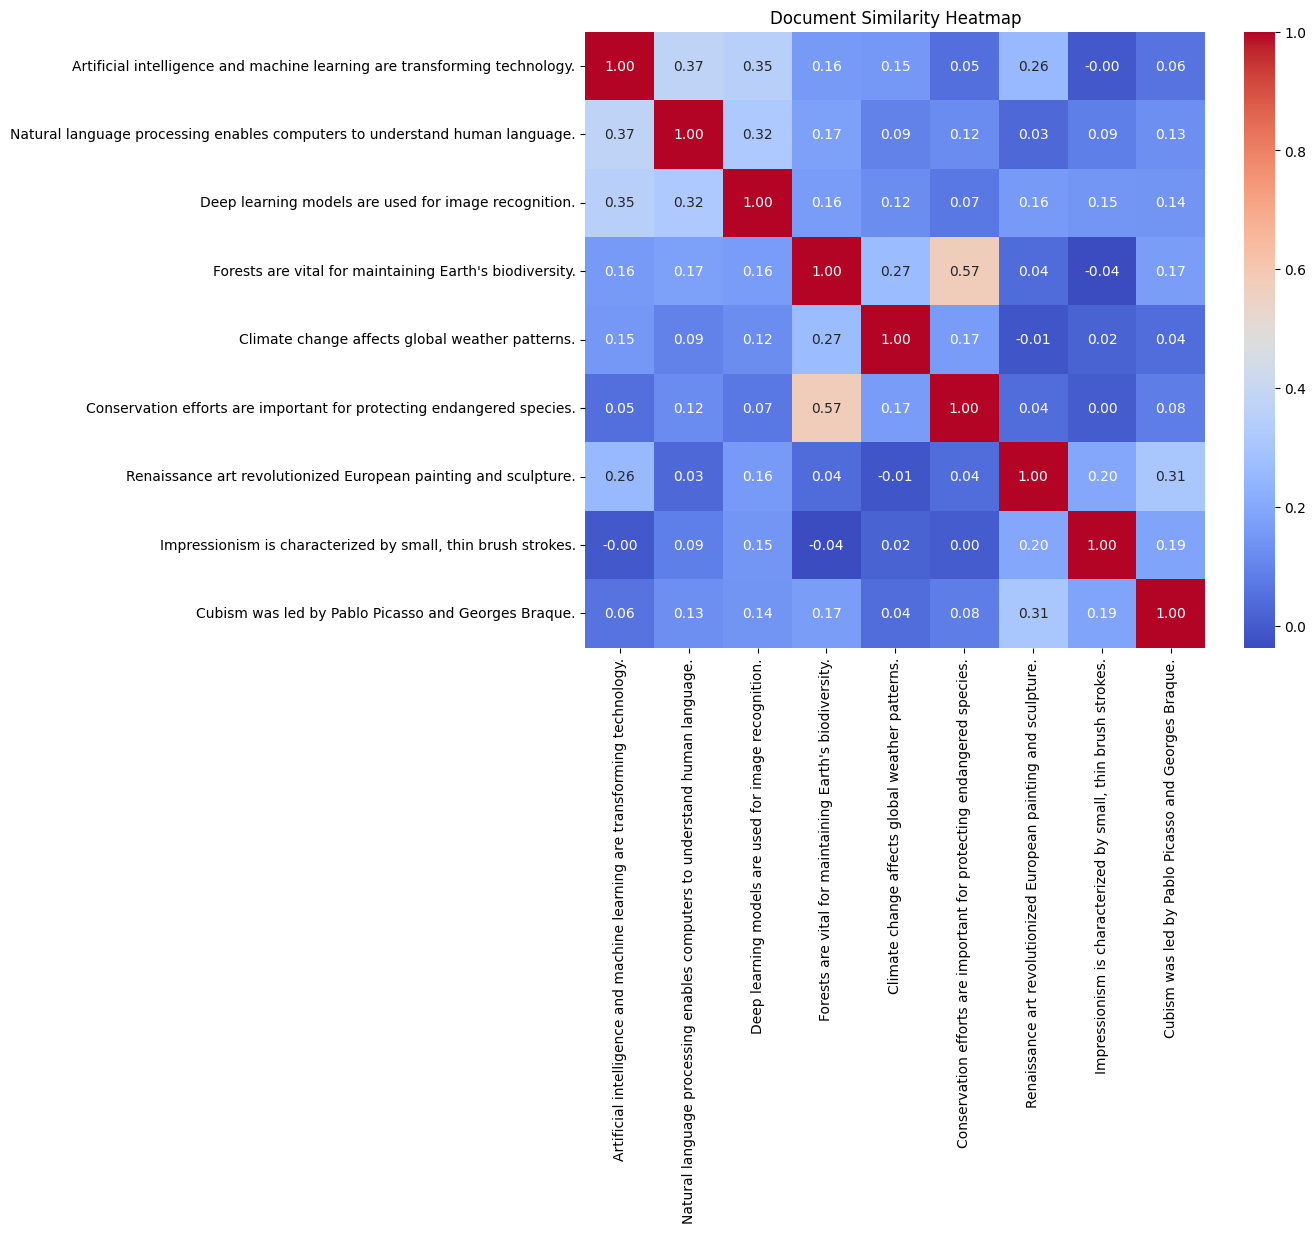

In [ ]:
# Let's visualize the results

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `similarity_scores` is already calculated as shown previously

# Create a heatmap to visualize the similarity scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    similarities_2,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    xticklabels=documents,
    yticklabels=documents,
)
plt.title("Document Similarity Heatmap")
plt.show()


## Let's visualize the embedding using PCA

### What is PCA?

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. This method transforms a large set of variables into a smaller one that still contains most of the information in the large set. The goal of PCA is to reduce the complexity of the data while retaining the variation present in the dataset as much as possible.



#### Why Dimensionality Reduction?

In many real-world applications, data comes in the form of high-dimensional vectors, which can be difficult to analyze and visualize. For instance, in our text embedding scenario, each document is transformed into a vector that might contain hundreds dimensions. While this high-dimensional space captures a lot of information, it's practically impossible for us to visualize or understand intuitively.

Dimensionality reduction helps in this aspect by simplifying the high-dimensional space into a lower-dimensional one, preserving as much of the significant information as possible. This process makes it easier to visualize, analyze, and interpret the data. Additionally, reducing the number of dimensions can also help improve the performance and computational efficiency of machine learning algorithms.


In [ ]:
# TODO - print the shape of embedding before dimensionality reduction
simple_embeddings.shape

(9, 384)

### Q4 - PCA: caluclations and vizualization

Using the `scikit-learn` library, we will perform PCA (Principal Component Analysis) on our document embeddings to reduce their dimensionality for visualization purposes. Follow these steps:

1. Create a new PCA instance by importing the PCA class from `sklearn.decomposition`. Specify `n_components=2` to reduce our data to two dimensions.

2. Fit the PCA model to your `simple_embeddings` and transform the data by using the `fit_transform` function. This will generate a new set of two-dimensional points representing your original embeddings.



In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# TODO Perform PCA for dimensionality reduction to 2 components
# remove `pass` in front of pca and pca_embeddings and write your code
# pca = ...
# pca_embeddings = ...

pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(simple_embeddings)

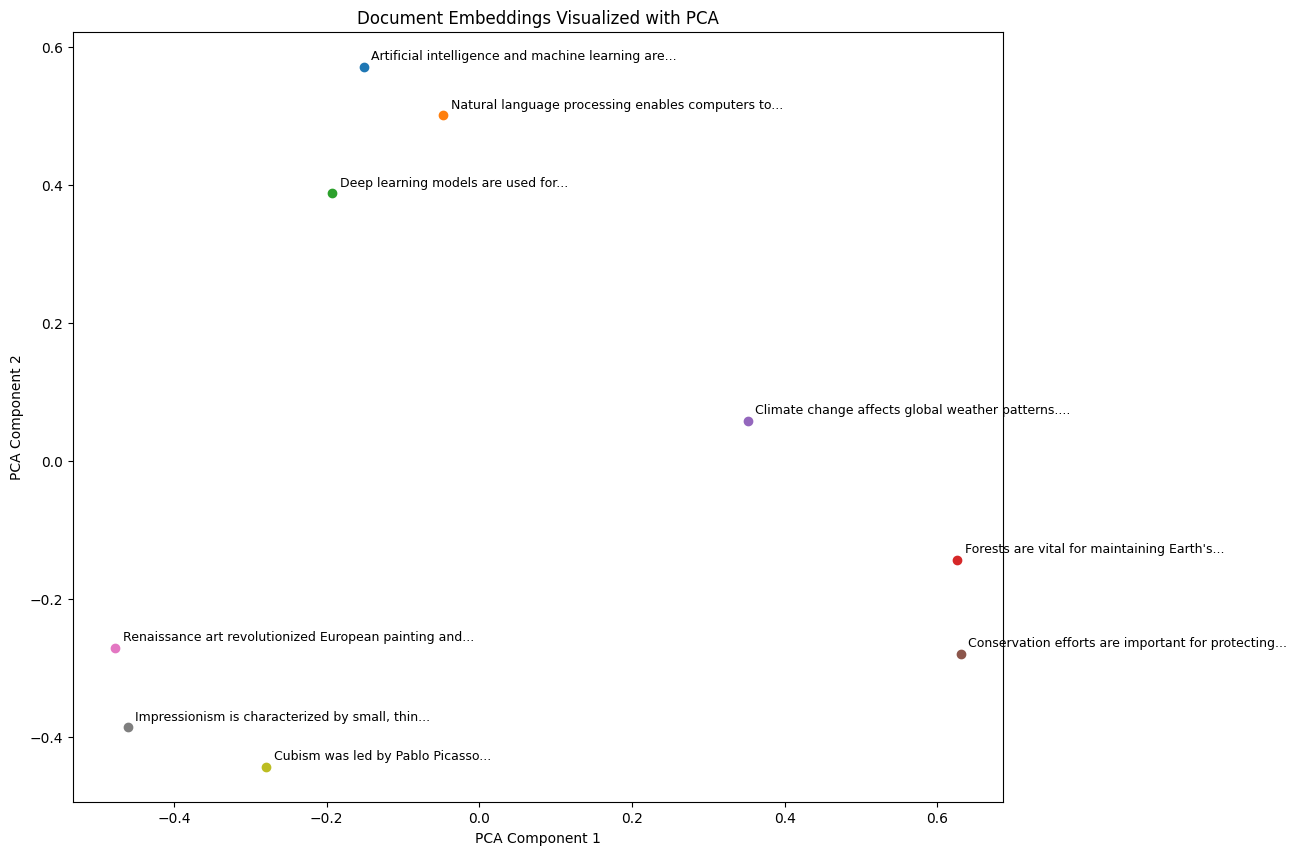

In [ ]:
# Visualize the PCA-reduced embeddings
plt.figure(figsize=(12, 10))  # Adjusted figure size for better readability
for i, doc in enumerate(documents):
    # Extract the first few words from each document for labeling
    label = " ".join(doc.split()[:6]) + "..."
    plt.scatter(pca_embeddings[i, 0], pca_embeddings[i, 1])
    plt.text(
        pca_embeddings[i, 0] + 0.01,  # Slightly offset the text for clarity
        pca_embeddings[i, 1] + 0.01,
        label,
        fontsize=9,
    )

plt.title("Document Embeddings Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

## Q5 - Report Your Understanding

Now that you have visualized the reduced-dimensional embeddings using PCA, take a moment to reflect on what you observe in the plot:

- **Cluster Patterns**: Do you notice any distinct clusters or groups of points? If yes, what might these clusters represent in the context of your document embeddings?

- **Outliers**: Are there any points that stand significantly apart from others?

- **Overall Distribution**: Describe the overall distribution of the points. Is there a clear separation between different types of documents, or do they overlap significantly?



```# write your response below```

Tarush's Response:

With the help of our Principal Component Analysis, we were able to make specific inferences about the nature of our document:

a. With PCA, we uncovered three centroids of similarities in themes of texts namely uncovering the topics of art, AI and ML, and Environment.

b. In terms of some Outliers, we uncovered that the sentence "Climate Change affects global weather patterns...." seems to be an outlier given it's distance with the clusters encompassing the themes of AI and Environment. Observing the Eucledean space of our graph, we can infer that the mentioned sentence is closer to the cluster covering the them of environment than AI.

c. Overall, there seems to be a significant distance between different themes of clusters, enough to make out the clusters and the similarities between different points of a prospective cluster. There are sentence(s) which seem to maintain a decent distance with respect to the centroids of different clusters.


In [ ]:
# Cluster Patterns: Yes. 1. Climate and Environment; 2. AI and Machine Learning; 3.Art <Boyong Wang's Response>

In [ ]:
# Outliers: Yes, there is a point that stand significantly apart from others, for example, climate change affects global weather patterns

In [ ]:
# Overall Distribution: The overall distribution of points: Second Quadrant, Third Quadrant and Fourth Quadrant. We can say there can be a clear seperation between different types of documents,
#We can say the seperation point is: (PCA Component 1, PCA Component 2)=(0,0)

## Q6 - Your Turn

Now, it's time for you to apply what you've learned by manually creating your own documents and analyzing their similarities. Follow these steps to complete this exercise:

1. **Create Documents**: Write 10-15 short text documents. These can be sentences or small paragraphs about different subjects or themes. Try to vary the content between them to see how this affects their similarity scores.

2. **Convert to Embeddings**: Use the pre-trained model from earlier in this notebook to convert your documents into embeddings. Remember, this process transforms your textual data into numerical vectors that can be compared.

3. **Compute Similarities**: Calculate the similarity scores between your document embeddings. You can use cosine similarity, which measures the cosine of the angle between two vectors. This will give you a value between -1 (completely different) and 1 (exactly the same).

4. **Report Similarities**: Analyze and report the similarity scores. Which documents are most similar to each other? Which are the most different? Reflect on why this might be the case based on the content of your documents.


In [ ]:
documents_new = [
    "There are 18 hours of daylight in Edmonton during mid-summer.",
    "There are only 7 hours of daylight in Edmonton during mid-winter.",
    "People in Edmonton never get true nights during mid-summer.",
    "People can watch aurora in Yellowknife from August to April.",
    "people can see mid-night sun in Yellowknife during mid-summer.",
    "Skiing is a popular sport in Canada.",
    "Golfing is a popular sport in North America.",
    "Swimming is a neccessary sport in Florida.",
    "Surfing is a popular sport in Florida in summer.",
    "Young Sheldon shows how smart Sheldon was in Science when he was young.",
    "Home-alone is a series of Christmas movies.",
    "Big-Bang Theory is a movie from United States.",
    "Severe thunderstorms come very quick in Florida in July.",
    "Lightning strikes happen very frequently in Florida in July.",
    "The temperature in Edmonton in winter is below -20.",

]

In [ ]:
# Generate embeddings for the simple documents
simple_embeddings_new = embedding_model.encode(documents_new)



In [ ]:
simple_embeddings_new.shape[0]

15

In [ ]:
simple_embeddings_new

array([[ 0.01712384,  0.0386717 ,  0.08805022, ..., -0.04359531,
        -0.07671007, -0.00989728],
       [ 0.01098075,  0.03674819,  0.0665502 , ..., -0.05110137,
        -0.06523144,  0.0271576 ],
       [ 0.05726875, -0.01379453,  0.01793397, ...,  0.03387446,
        -0.05386528,  0.02573586],
       ...,
       [ 0.04109446, -0.05739433,  0.05164428, ..., -0.09542801,
        -0.03250657,  0.02765598],
       [ 0.02788567, -0.03312832,  0.05438212, ..., -0.07283744,
        -0.07236957,  0.06360145],
       [-0.0253097 ,  0.05544939,  0.06111115, ..., -0.06807788,
        -0.07144783,  0.03720688]], dtype=float32)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity



similarities_2_new = cosine_similarity(simple_embeddings_new)
print("Final Cosine Similarity Scores: \n",similarities_2_new)

Final Cosine Similarity Scores: 
 [[ 1.          0.758391    0.60660636  0.24798587  0.34380817  0.2754941
   0.06469205  0.05166816  0.14127107  0.08157922  0.08303702 -0.04113899
   0.25193852  0.22480866  0.5706345 ]
 [ 0.758391    1.          0.6314448   0.18517679  0.23683393  0.26953846
   0.02682111  0.03617845  0.02892053  0.0388169   0.1787332  -0.03718628
   0.19195798  0.18650526  0.54637253]
 [ 0.60660636  0.6314448   1.          0.19030094  0.25895074  0.25164238
   0.1276875   0.12148844  0.17833474  0.0601583   0.17586577  0.02289872
   0.2517743   0.2782331   0.34779817]
 [ 0.24798587  0.18517679  0.19030094  1.0000002   0.6482235   0.1790635
   0.09005423  0.08916563  0.16676228  0.02200006  0.18157089  0.04052372
   0.2625939   0.32389677  0.03064064]
 [ 0.34380817  0.23683393  0.25895074  0.6482235   0.99999994  0.1315797
   0.06233118  0.09531604  0.27875832  0.0266553   0.04776151 -0.01777941
   0.2617452   0.25005504  0.05310962]
 [ 0.2754941   0.26953846  0.25164

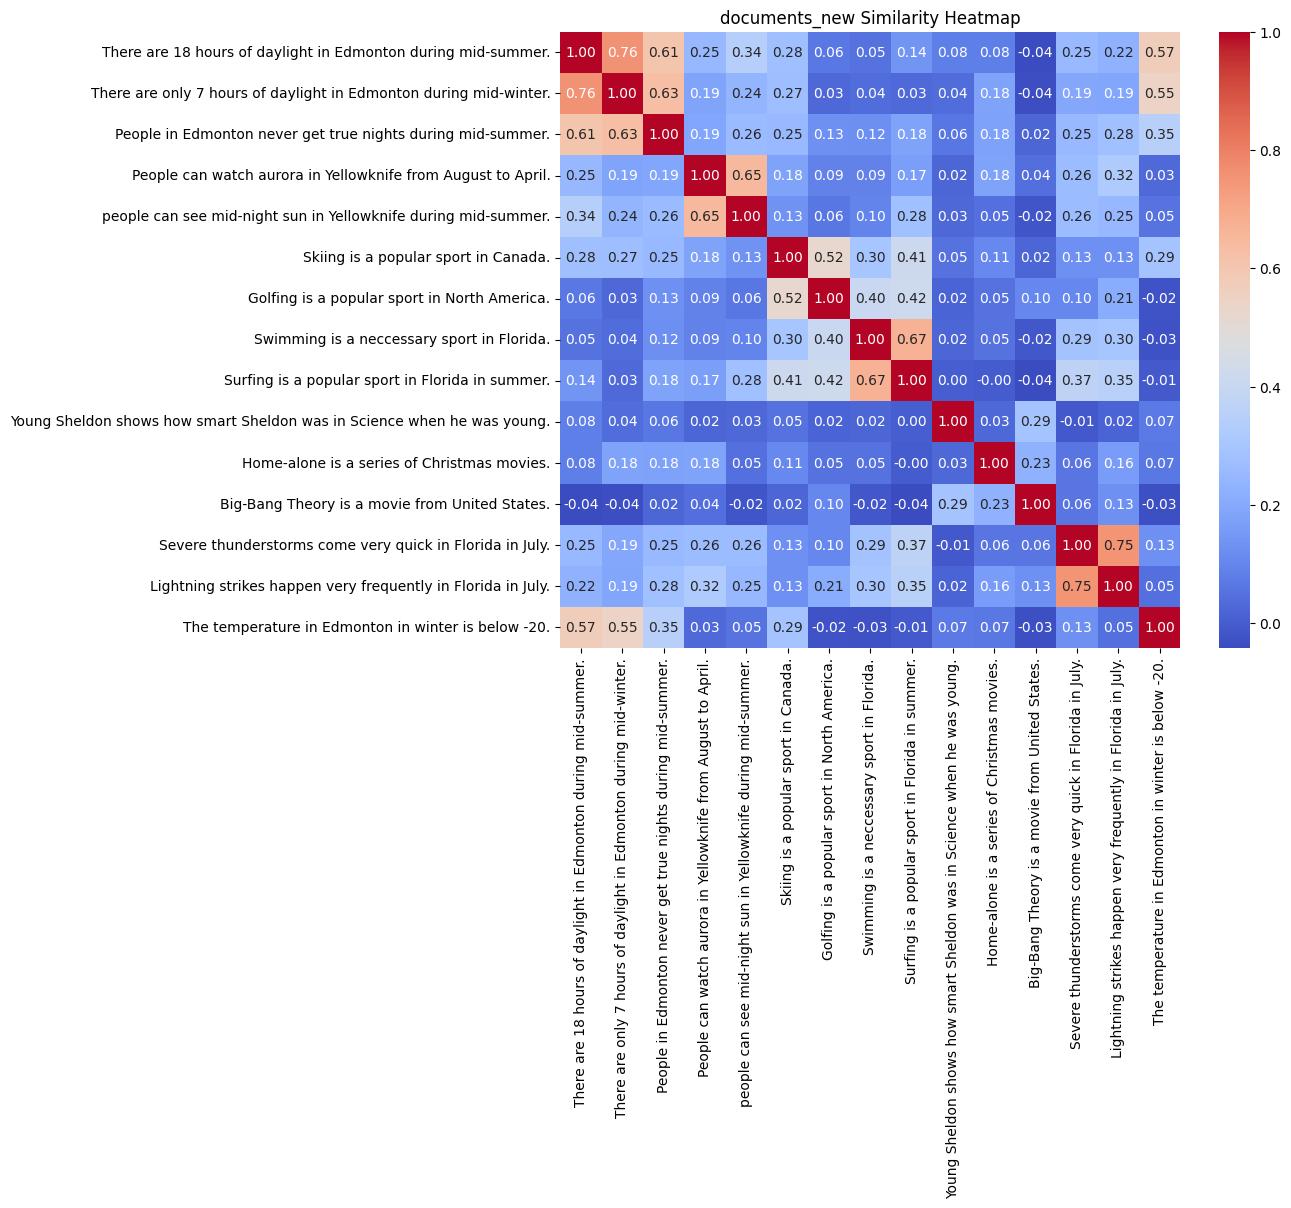

In [ ]:
# Let's visualize the results

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `similarity_scores` is already calculated as shown previously

# Create a heatmap to visualize the similarity scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    similarities_2_new,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    xticklabels=documents_new,
    yticklabels=documents_new,
)
plt.title("documents_new Similarity Heatmap")
plt.show()

In [ ]:
# TODO - print the shape of embedding before dimensionality reduction
simple_embeddings_new.shape

(15, 384)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# TODO Perform PCA for dimensionality reduction to 2 components
# remove `pass` in front of pca and pca_embeddings and write your code
# pca = ...
# pca_embeddings = ...

pca_new = PCA(n_components=2)
pca_embeddings_new = pca.fit_transform(simple_embeddings_new)

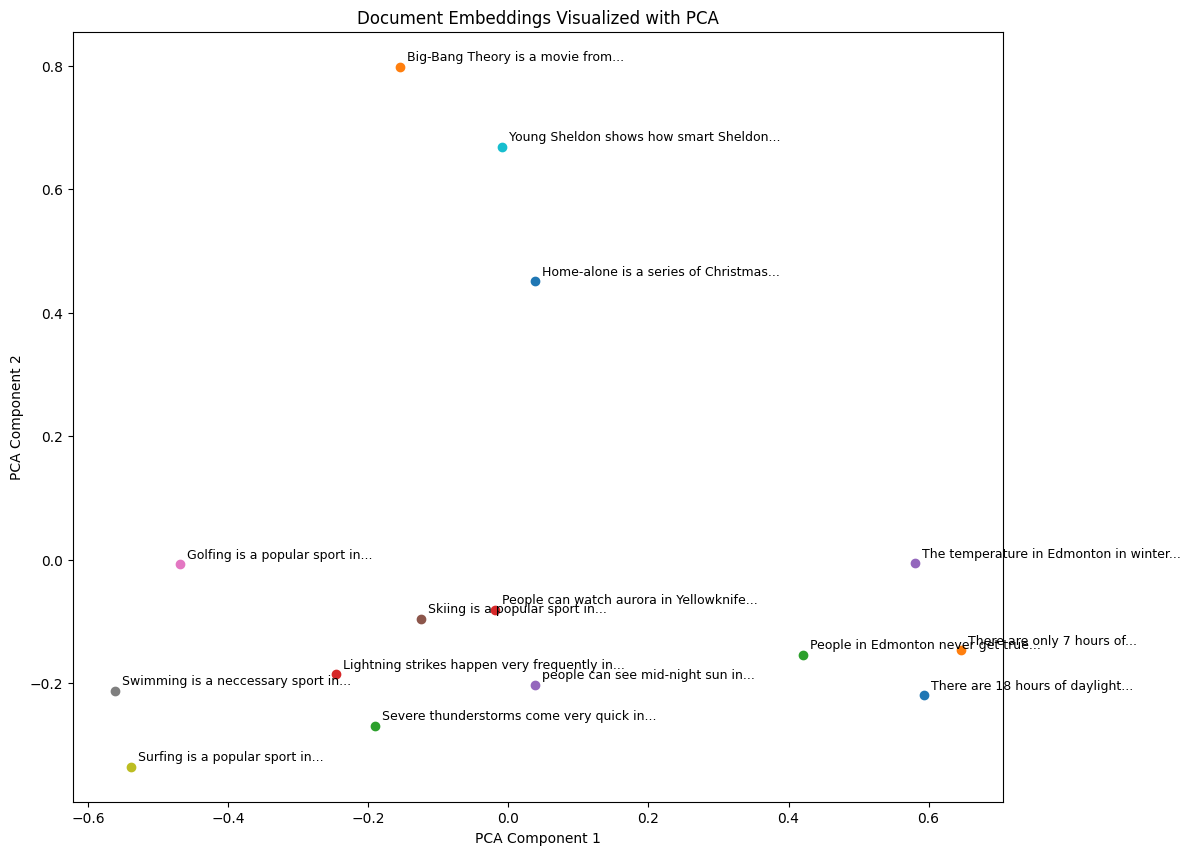

In [ ]:
# Visualize the PCA-reduced embeddings
plt.figure(figsize=(12, 10))  # Adjusted figure size for better readability
for i, doc in enumerate(documents_new):
    # Extract the first few words from each document for labeling
    label = " ".join(doc.split()[:6]) + "..."
    plt.scatter(pca_embeddings_new[i, 0], pca_embeddings_new[i, 1])
    plt.text(
        pca_embeddings_new[i, 0] + 0.01,  # Slightly offset the text for clarity
        pca_embeddings_new[i, 1] + 0.01,
        label,
        fontsize=9,
    )

plt.title("Document Embeddings Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

Tarush's Response:

With the help of our Principal Component Analysis, we were able to make specific inferences about the nature of our document:

a. While there are some distributions observed, overall there does not seem to be a dominating presence of a cohesive cluster. Most of the texts in our new document seem to related enough to each other to form subtle clusters as compared to strong, more cohesive ones like the ones which we saw previously. However, there are still lighter conglomerations of texts which can be broadly classified as i) Florida/North America/Sports and Storm (overlapping themes - but not commonly found in all the texts in the bottom left cluster), ii) Edmonton (bottom right) and iii) Hollywood Movies/ TV Shows (top center).

b. In terms of some Outliers, there are none which we explicitly observed. In terms of the lighter clusters of texts, most of the texts belonging to a prospective cluster seem to be maintaining similar Eucledean distances in the graph clusters. However, some exceptions can include lines like "Skiing is a popular sport in Canada" is closer to sentences like "People can watch aurora in Yellowknife...." than other sentences mentioning sports.

c. Overall, the texts in our documents conglomerate enough to make out three broad clusters encompassing different themes of subject. However, our text points did seem to have enough differences to have decent eucledean distances amongst themselves to not have a very strong and apparent clusters. The PCA uncovered the similarities and differences between different texts of our documents and help visualize the similarity scores on a 2D Graph.

In [ ]:
# Boyong Wang Answer
# Cluster Patterns: 1. Sports, 2.Weather in Florida, 3. Things can watch in Yellowknife, 3. About Edmonton, 4. About Edmonton 5. Movies

In [ ]:
# Boyong Wang Answer
# Outliers:Yes, There is an outlier observed, it is the document "Skiing is a popular sport in Canada"

In [ ]:
# Boyong Wang Answer
# Overall Distribution: 1. Area below PCA 2=0.1 and left side of PCA 1=-0.3; 2. Area below PCA 2=0.1, and between PCA 1=-0.3 and PCA 1=-0.1; 3. Area below
# PCA 2=0.1 and between PCA 1=-0.1 and PCA 1=0.3; 4. Area below PCA 2=0.1 and right side of PCA 1=0.3; 5. Area above PCA 2=0.1
# There are several seperation points: (PCA 1, PCA 2)= (-0.3,0.1), (-0.1, 0.1), (0.3,0.1)

## Clustering using Embedding and kMeans

In this part of our project, we will delve into the practical application of kMeans clustering with our document embeddings. The aim is to uncover natural groupings within our collection of documents based on their content similarities.

### Understanding kMeans Clustering

kMeans is a popular clustering algorithm that organizes data into k distinct clusters based on feature similarities. For our text analysis, these features come from the embedding vectors representing our documents. By applying kMeans, we aim to identify documents that are contextually similar and group them together.

### Setting the Stage with kMeans:

For our specific case, we have decided to set `num_clusters = 3`, `init="k-means++"`, `max_iter=300`, `n_init=10`





### Q7 - Implementing kMeans Clustering:

To apply kMeans clustering to our document embeddings, follow these steps:

1. **Initialization**:
   Import the `KMeans` class from `sklearn.cluster` and create a new instance of KMeans. You need to specify `n_clusters=3`,  `num_clusters = 3`, `init="k-means++"`, `max_iter=300`, `n_init=10`. Also set `random_state=42` for reproducibility of results.

2. **Fitting the Model**:
   Use the `fit_predict` method to compute the cluster centers and predict cluster indices for our embeddings. This method automatically assigns each document to one of the three clusters.

3. **Analyzing the Results**:
   Once clustering is complete, examine the distribution of documents across the clusters. Try to interpret the characteristics of each cluster by reviewing the documents within them. This could provide insights into the different themes or topics present in your document set.

In [ ]:
corpus = [
    "The apple is a sweet fruit",
    "Oranges are citrus fruits",
    "Bananas are rich in potassium",
    "Strawberries are red fruits",
    "Dogs are domesticated animals",
    "Cats are also pets",
    "Elephants are the largest land mammals",
    "Cows provide us with milk",
    "Sharks are marine predators",
    "Whales are the largest marine mammals",
    "Dolphins are very intelligent",
    "Artificial intelligence is the future",
    "Machine learning is a subset of AI",
    "Deep learning is a part of machine learning",
    "Neural networks are used in deep learning",
    "Grapes are popular in wine making",
    "Lions are considered the kings of the jungle",
    "Programming languages like Python are essential for software development",
    "Quantum computing is a revolutionary technology",
    "Blockchain technology underpins cryptocurrencies",
    "The cheetah is the fastest land animal",
    "Pandas are beloved for their distinctive black and white coloring",
    "The heart pumps blood throughout the body",
    "The brain is the center of the nervous system",
    "Mount Everest is the Earth's highest mountain above sea level",
    "The Sahara is the largest hot desert in the world",
    "The Amazon rainforest is the largest rainforest on the planet",
    "Renewable energy sources include solar and wind power",
    "The Pacific Ocean is the largest ocean on Earth",
    "The Moon is Earth's only natural satellite",
]


df = pd.DataFrame({"documents": corpus})

In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")

# Encode the documents in the corpus
document_embeddings = model.encode(corpus)

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 3
init_mode="k-means++"
max_iter=300
n_init=10
random_state=42


# remove pass and write your code
clustering_model = KMeans(n_clusters=num_clusters,init= init_mode ,n_init = n_init,max_iter = max_iter,random_state = random_state)
# TODO fit the model
clustering_model.fit_predict(document_embeddings)
# get the clsuter assignments
cluster_assignment = clustering_model.labels_

cluster_assignment.shape
cluster_assignment
df["cluster"] = cluster_assignment

In [ ]:
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print(df[df["cluster"] == i]["documents"].values, "\n")

Cluster 0:
['The apple is a sweet fruit' 'Oranges are citrus fruits'
 'Bananas are rich in potassium' 'Strawberries are red fruits'
 'Grapes are popular in wine making'] 

Cluster 1:
['Artificial intelligence is the future'
 'Machine learning is a subset of AI'
 'Deep learning is a part of machine learning'
 'Neural networks are used in deep learning'
 'Programming languages like Python are essential for software development'
 'Quantum computing is a revolutionary technology'
 'Blockchain technology underpins cryptocurrencies'
 'The heart pumps blood throughout the body'
 'Renewable energy sources include solar and wind power'] 

Cluster 2:
['Dogs are domesticated animals' 'Cats are also pets'
 'Elephants are the largest land mammals' 'Cows provide us with milk'
 'Sharks are marine predators' 'Whales are the largest marine mammals'
 'Dolphins are very intelligent'
 'Lions are considered the kings of the jungle'
 'The cheetah is the fastest land animal'
 'Pandas are beloved for their di

## Retrieval

In this section, we'll lay the groundwork for a document retrieval system. The aim is to create simple code that retrieves the most related documents based on a given query for the second part of the assignment. To find the similarity between a document and a query, we just use simple cosine similarity and return the most similar document.


In [ ]:
documents = [
    "The Eiffel Tower is a wrought-iron lattice tower on the Champ de Mars in Paris, France. It is named after the engineer Gustave Eiffel, whose company designed and built the tower.",
    "The Great Wall of China is a series of fortifications made of stone, brick, tamped earth, wood, and other materials, generally built along an east-to-west line across the historical northern borders of China to protect the Chinese states and empires against the raids and invasions of various nomadic groups.",
    "The Statue of Liberty is a colossal neoclassical sculpture on Liberty Island in New York Harbor in New York City, in the United States. The copper statue, a gift from the people of France to the people of the United States, was designed by French sculptor Frédéric Auguste Bartholdi and built by Gustave Eiffel.",
    "The Colosseum or Coliseum, also known as the Flavian Amphitheatre, is an oval amphitheatre in the centre of the city of Rome, Italy. Built of travertine limestone, tuff, and brick-faced concrete, it was the largest amphitheatre ever built at the time and is still the largest amphitheatre in the world today.",
    "The Taj Mahal is an ivory-white marble mausoleum on the south bank of the Yamuna river in the Indian city of Agra. It was commissioned in 1632 by the Mughal emperor Shah Jahan to house the tomb of his favourite wife, Mumtaz Mahal; it also houses the tomb of Shah Jahan himself.",
    "The Sydney Opera House is a multi-venue performing arts centre in Sydney, New South Wales, Australia. It is one of the 20th century's most famous and distinctive buildings.",
    "Machu Picchu is an Incan citadel set high in the Andes Mountains in Peru, above the Urubamba River valley. Built in the 15th century and later abandoned, it’s renowned for its sophisticated dry-stone construction that fuses huge blocks without the use of mortar.",
    "The Acropolis of Athens is an ancient citadel located on a rocky outcrop above the city of Athens and contains the remains of several ancient buildings of great architectural and historic significance, the most famous being the Parthenon.",
    "Stonehenge is a prehistoric monument in Wiltshire, England, two miles west of Amesbury. It consists of a ring of standing stones, each around 13 feet high, seven feet wide, and weighing around 25 tons.",
    "The Forbidden City is a palace complex in central Beijing, China. The former Chinese imperial palace from the Ming dynasty to the end of the Qing dynasty, it now houses the Palace Museum.",
    "Mount Rushmore National Memorial is a sculpture carved into the granite face of Mount Rushmore, South Dakota, United States. Sculpted by Danish-American Gutzon Borglum and his son, Lincoln Borglum, the monument features the 60-foot heads of Presidents George Washington, Thomas Jefferson, Theodore Roosevelt, and Abraham Lincoln.",
    "The Louvre Museum is the world's largest art museum and a historic monument in Paris, France. A central landmark of the city, it is located on the Right Bank of the Seine in the city's 1st arrondissement.",
    "The Grand Canyon is a steep-sided canyon carved by the Colorado River in Arizona, United States. It is 277 miles long, up to 18 miles wide, and attains a depth of over a mile.",
    "Petra is a historical and archaeological city in southern Jordan. It is famous for its rock-cut architecture and water conduit system. Another name for Petra is the Rose City due to the color of the stone out of which it is carved.",
    "Christ the Redeemer is an Art Deco statue of Jesus Christ in Rio de Janeiro, Brazil, created by French sculptor Paul Landowski and built by Brazilian engineer Heitor da Silva Costa, in collaboration with French engineer Albert Caquot.",
    "The Kremlin is a fortified complex in the center of Moscow, Russia, including five palaces, four cathedrals, and the enclosing Kremlin Wall with Kremlin towers.",
    "The Leaning Tower of Pisa is a freestanding bell tower, of the cathedral of the Italian city of Pisa, known worldwide for its nearly four-degree lean, the result of an unstable foundation.",
    "The Great Barrier Reef is the world's largest coral reef system located in the Coral Sea, off the coast of Queensland, Australia. It is made up of over 2,900 individual reefs and 900 islands stretching over 2,300 kilometers.",
    "The Sistine Chapel is a chapel in the Apostolic Palace, the official residence of the pope, in Vatican City. Originally known as the Cappella Magna, it is famous for its Renaissance frescoes by Michelangelo.",
    "The Pyramids of Giza, located in the Giza plateau of Egypt, are three fourth-dynasty (c. 2613–2494 BC) pyramids which include the Great Pyramid of Giza, one of the Seven Wonders of the Ancient World.",
    "The Alhambra is a palace and fortress complex located in Granada, Andalusia, Spain. It was originally constructed as a small fortress in 889 and then largely ignored until its ruins were renovated and rebuilt in the mid-13th century by the Nasrid emir Mohammed ben Al-Ahmar.",
    "The Tower of London, officially Her Majesty's Royal Palace and Fortress of the Tower of London, is a historic castle located on the north bank of the River Thames in central London.",
    "Angkor Wat is a temple complex in Cambodia and the largest religious monument in the world, originally constructed as a Hindu temple dedicated to the god Vishnu for the Khmer Empire, gradually transforming into a Buddhist temple toward the end of the 12th century.",
    "The Empire State Building is a 102-story Art Deco skyscraper in Midtown Manhattan, New York City. Designed by Shreve, Lamb & Harmon and completed in 1931, the building has a roof height of 1,250 feet and stands a total of 1,454 feet tall, including its antenna.",
    "Buckingham Palace is the London residence and administrative headquarters of the monarch of the United Kingdom. Located in the City of Westminster, the palace is often at the center of state occasions and royal hospitality.",
    "The Golden Gate Bridge is a suspension bridge spanning the Golden Gate, the one-mile-wide strait connecting San Francisco Bay and the Pacific Ocean.",
    "The Rialto Bridge is one of the four bridges spanning the Grand Canal in Venice, Italy. It is the oldest bridge across the canal and was the dividing line for the districts of San Marco and San Polo.",
    "The Burj Khalifa, known as the Burj Dubai prior to its inauguration in 2010, is a skyscraper in Dubai, United Arab Emirates. With a total height of 829.8 m (2,722 ft) and a roof height (excluding antenna) of 828 m (2,717 ft), the Burj Khalifa has been the tallest structure and building in the world since its topping out in 2009."
    "The Hagia Sophia is a former Greek Orthodox Christian patriarchal cathedral, later an Ottoman imperial mosque and now a museum in Istanbul, Turkey. Built in 537 AD at the beginning of the Middle Ages, it was famous in particular for its massive dome.",
    "The Chichen Itza is a complex of Mayan ruins on Mexico's Yucatán Peninsula. A massive step pyramid, known as El Castillo or Temple of Kukulcan, dominates the ancient city, which thrived from around 600 A.D. to the 1200s.",
    "The Neuschwanstein Castle is a 19th-century Romanesque Revival palace on a rugged hill above the village of Hohenschwangau near Füssen in southwest Bavaria, Germany. The palace was commissioned by Ludwig II of Bavaria as a retreat and in honour of Richard Wagner.",
    "The Sagrada Familia is a large unfinished Roman Catholic minor basilica in the Eixample district of Barcelona, Catalonia, Spain. Designed by Spanish/Catalan architect Antoni Gaudí, his work on the building is part of a UNESCO World Heritage Site.",
    "The Palace of Versailles was the principal royal residence of France from 1682, under Louis XIV, until the start of the French Revolution in 1789, under Louis XVI. It is located in the department of Yvelines, in the region of Île-de-France, about 20 kilometres southwest of the centre of Paris.",
    "The Terracotta Army is a collection of terracotta sculptures depicting the armies of Qin Shi Huang, the first Emperor of China. It is a form of funerary art buried with the emperor in 210–209 BCE with the purpose of protecting the emperor in his afterlife.",
    "The Potala Palace is a dzong fortress in the city of Lhasa, in China's Tibet Autonomous Region. It was the winter palace of the Dalai Lamas from 1649 to 1959, has been a museum since then, and is a World Heritage Site since 1994.",
    "The Parthenon is a former temple on the Athenian Acropolis, Greece, dedicated to the goddess Athena, whom the people of Athens considered their patron. Construction began in 447 BC when the Athenian Empire was at the peak of its power.",
    "The Moai are monolithic human figures carved by the Rapa Nui people on Easter Island in eastern Polynesia between the years 1250 and 1500. Nearly half are still at Rano Raraku, the main moai quarry, but hundreds were transported from there and set on stone platforms called ahu around the island's perimeter.",
]

Generate document embeddings using the `SentenceTransformer` model:




In [ ]:
# Preprocess documents and generate embeddings
embeddings = []
for doc in documents:
    doc_embedding = embedding_model.encode(
        doc
    )  # Use SentenceTransformer for embeddings
    embeddings.append(doc_embedding)

##  Q8 Calculate the similartiy between Query and Documents

Finalize function (similarity calculation)

In [ ]:
def retrieve_top_k_documents(query, documents, k=3):
    query_embedding = embedding_model.encode(query)
    similarities = []
    for doc in documents:
        doc_embedding = embedding_model.encode(doc)
        similarity = cosine_similarity(doc_embedding.reshape(1,-1),query_embedding.reshape(1,-1)) # remove pass your calcualte the cosine similarity between query_embedding and doc_embedding
        similarities.append((doc, similarity))

    top_k_docs = sorted(similarities, key=lambda x: x[1], reverse=True)[:k]
    return [doc for doc, _ in top_k_docs]


query = "Who designed the Statue of Liberty and the Eiffel Tower?"
top_k_docs = retrieve_top_k_documents(query, documents, k=3)
print("Top 3 similar documents:")
for doc in top_k_docs:
    print(doc)

Top 3 similar documents:
The Eiffel Tower is a wrought-iron lattice tower on the Champ de Mars in Paris, France. It is named after the engineer Gustave Eiffel, whose company designed and built the tower.
The Statue of Liberty is a colossal neoclassical sculpture on Liberty Island in New York Harbor in New York City, in the United States. The copper statue, a gift from the people of France to the people of the United States, was designed by French sculptor Frédéric Auguste Bartholdi and built by Gustave Eiffel.
The Tower of London, officially Her Majesty's Royal Palace and Fortress of the Tower of London, is a historic castle located on the north bank of the River Thames in central London.


Now let's visualize the documents and the query

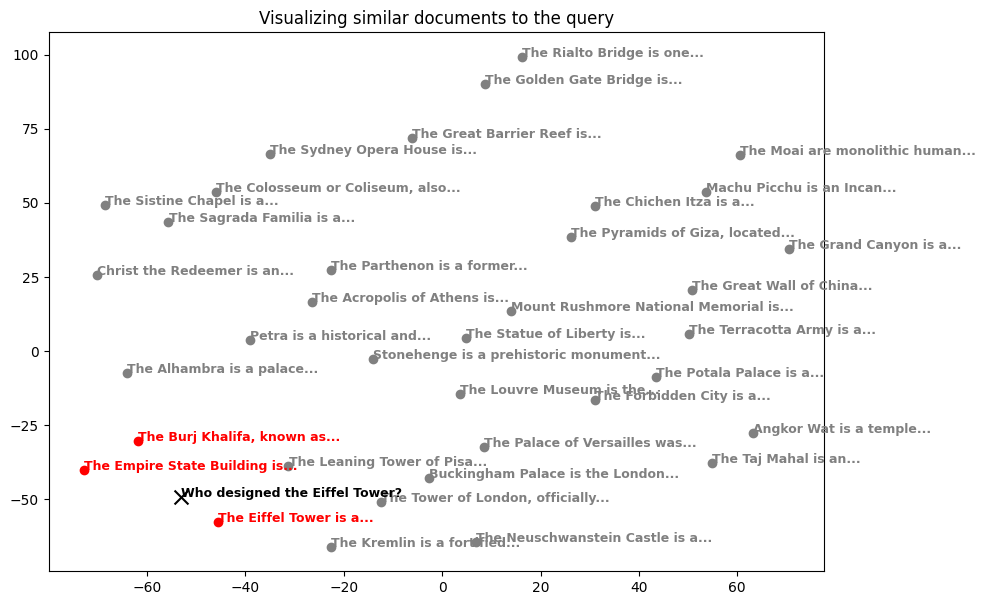

In [ ]:
# Define the query
query = "Who designed the Eiffel Tower?"

# Encode the query
query_embedding = embedding_model.encode(query)

# Add the query embedding to the document embeddings
all_embeddings = np.vstack([embeddings, query_embedding])

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0, perplexity=10)
all_embeddings_2d = tsne.fit_transform(all_embeddings)

# Extract the document and query embeddings in 2D
embeddings_2d = all_embeddings_2d[:-1]
query_embedding_2d = all_embeddings_2d[-1]

# Calculate distances from the query to each document in the 2D space
distances = np.sqrt(np.sum((embeddings_2d - query_embedding_2d) ** 2, axis=1))

# Get indices of the top 3 nearest documents
top_3_indices = np.argsort(distances)[:3]

# Visualize the clusters and the query
plt.figure(figsize=(10, 7))
default_color = "grey"  # Color for non-highlighted documents
highlight_color = "red"  # Color for highlighted documents
for i, doc in enumerate(documents):
    # Extract the first few words from each document for labeling
    label = " ".join(doc.split()[:5]) + "..."
    color = highlight_color if i in top_3_indices else default_color
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c=color)
    plt.text(
        embeddings_2d[i, 0] + 0.01,  # Slightly offset the text for clarity
        embeddings_2d[i, 1] + 0.01,
        label,
        color=color,
        fontdict={"weight": "bold", "size": 9},
    )

# Highlight the query
plt.scatter(query_embedding_2d[0], query_embedding_2d[1], c="black", marker="x", s=100)
plt.text(
    query_embedding_2d[0] + 0.01,  # Slightly offset the text for clarity
    query_embedding_2d[1] + 0.01,
    query,
    color="black",
    fontdict={"weight": "bold", "size": 9},
)

plt.title("Visualizing similar documents to the query")
plt.show()

## Your turn

Create multiple queries and assess whether the retrieved documents are `relevant` to the queries. Provide at least three sample queries and their corresponding nearest documents. (you should submit the visualizations and also the retrieved documents)



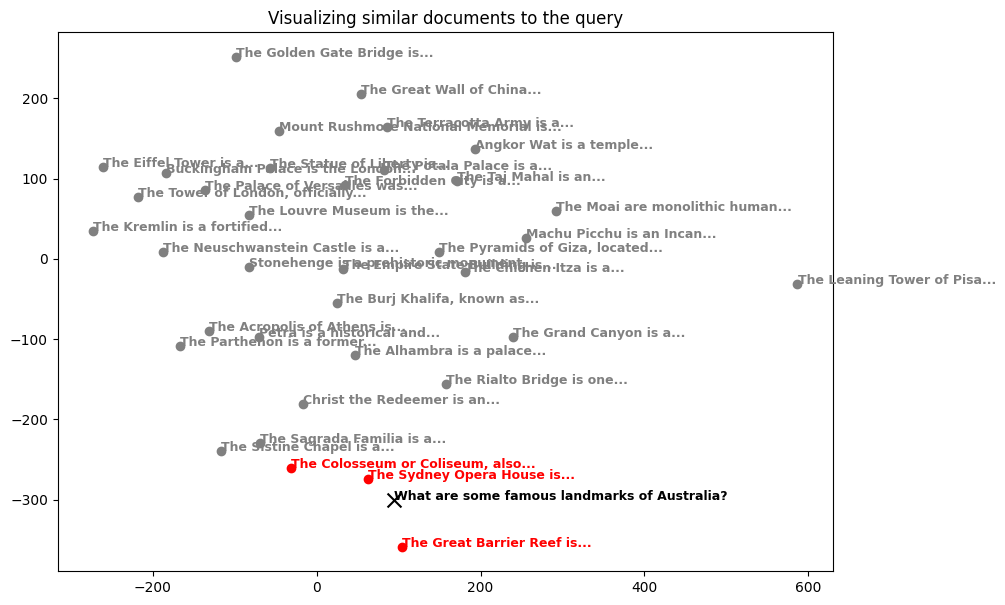

In [ ]:
# Define the query
query = "What are some famous landmarks of Australia?"

# Encode the query
query_embedding = embedding_model.encode(query)

# Add the query embedding to the document embeddings
all_embeddings = np.vstack([embeddings, query_embedding])

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0, perplexity=10)
all_embeddings_2d = tsne.fit_transform(all_embeddings)

# Extract the document and query embeddings in 2D
embeddings_2d = all_embeddings_2d[:-1]
query_embedding_2d = all_embeddings_2d[-1]

# Calculate distances from the query to each document in the 2D space
distances = np.sqrt(np.sum((embeddings_2d - query_embedding_2d) ** 2, axis=1))

# Get indices of the top 3 nearest documents
top_3_indices = np.argsort(distances)[:3]

# Visualize the clusters and the query
plt.figure(figsize=(10, 7))
default_color = "grey"  # Color for non-highlighted documents
highlight_color = "red"  # Color for highlighted documents
for i, doc in enumerate(documents):
    # Extract the first few words from each document for labeling
    label = " ".join(doc.split()[:5]) + "..."
    color = highlight_color if i in top_3_indices else default_color
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c=color)
    plt.text(
        embeddings_2d[i, 0] + 0.01,  # Slightly offset the text for clarity
        embeddings_2d[i, 1] + 0.01,
        label,
        color=color,
        fontdict={"weight": "bold", "size": 9},
    )

# Highlight the query
plt.scatter(query_embedding_2d[0], query_embedding_2d[1], c="black", marker="x", s=100)
plt.text(
    query_embedding_2d[0] + 0.01,  # Slightly offset the text for clarity
    query_embedding_2d[1] + 0.01,
    query,
    color="black",
    fontdict={"weight": "bold", "size": 9},
)

plt.title("Visualizing similar documents to the query")
plt.show()

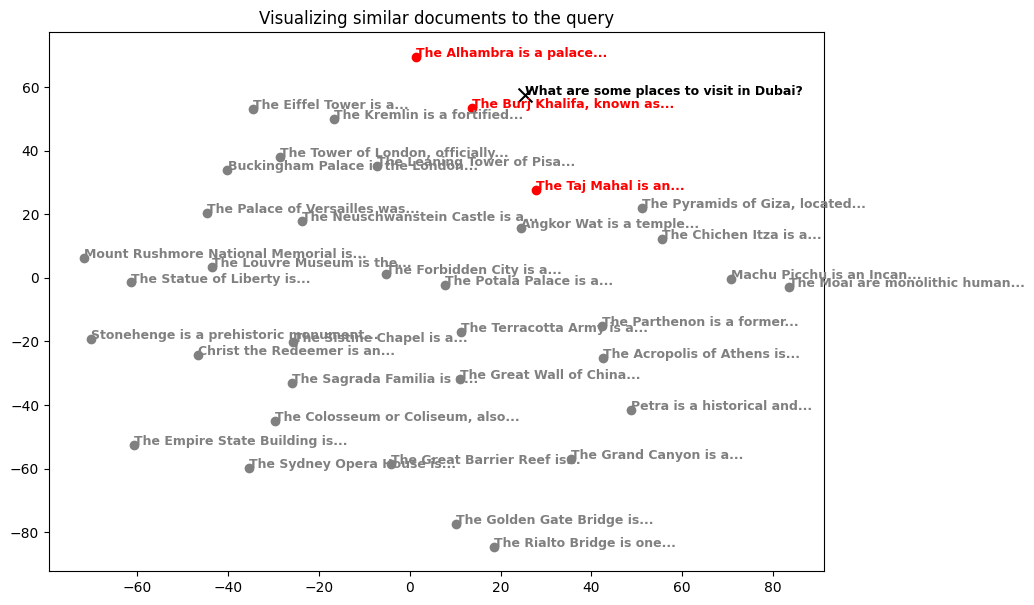

In [ ]:
# Define the query
query = "What are some places to visit in Dubai? "

# Encode the query
query_embedding = embedding_model.encode(query)

# Add the query embedding to the document embeddings
all_embeddings = np.vstack([embeddings, query_embedding])

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0, perplexity=10)
all_embeddings_2d = tsne.fit_transform(all_embeddings)

# Extract the document and query embeddings in 2D
embeddings_2d = all_embeddings_2d[:-1]
query_embedding_2d = all_embeddings_2d[-1]

# Calculate distances from the query to each document in the 2D space
distances = np.sqrt(np.sum((embeddings_2d - query_embedding_2d) ** 2, axis=1))

# Get indices of the top 3 nearest documents
top_3_indices = np.argsort(distances)[:3]

# Visualize the clusters and the query
plt.figure(figsize=(10, 7))
default_color = "grey"  # Color for non-highlighted documents
highlight_color = "red"  # Color for highlighted documents
for i, doc in enumerate(documents):
    # Extract the first few words from each document for labeling
    label = " ".join(doc.split()[:5]) + "..."
    color = highlight_color if i in top_3_indices else default_color
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c=color)
    plt.text(
        embeddings_2d[i, 0] + 0.01,  # Slightly offset the text for clarity
        embeddings_2d[i, 1] + 0.01,
        label,
        color=color,
        fontdict={"weight": "bold", "size": 9},
    )

# Highlight the query
plt.scatter(query_embedding_2d[0], query_embedding_2d[1], c="black", marker="x", s=100)
plt.text(
    query_embedding_2d[0] + 0.01,  # Slightly offset the text for clarity
    query_embedding_2d[1] + 0.01,
    query,
    color="black",
    fontdict={"weight": "bold", "size": 9},
)

plt.title("Visualizing similar documents to the query")
plt.show()

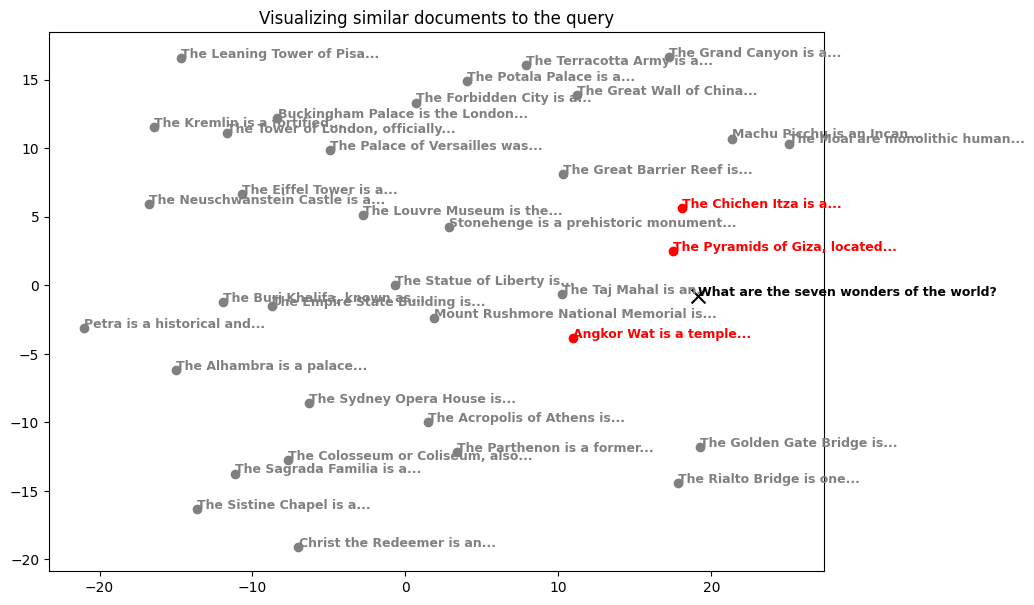

In [ ]:
# Define the query
query = "What are the seven wonders of the world?"

# Encode the query
query_embedding = embedding_model.encode(query)

# Add the query embedding to the document embeddings
all_embeddings = np.vstack([embeddings, query_embedding])

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0, perplexity=10)
all_embeddings_2d = tsne.fit_transform(all_embeddings)

# Extract the document and query embeddings in 2D
embeddings_2d = all_embeddings_2d[:-1]
query_embedding_2d = all_embeddings_2d[-1]

# Calculate distances from the query to each document in the 2D space
distances = np.sqrt(np.sum((embeddings_2d - query_embedding_2d) ** 2, axis=1))

# Get indices of the top 3 nearest documents
top_3_indices = np.argsort(distances)[:3]

# Visualize the clusters and the query
plt.figure(figsize=(10, 7))
default_color = "grey"  # Color for non-highlighted documents
highlight_color = "red"  # Color for highlighted documents
for i, doc in enumerate(documents):
    # Extract the first few words from each document for labeling
    label = " ".join(doc.split()[:5]) + "..."
    color = highlight_color if i in top_3_indices else default_color
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c=color)
    plt.text(
        embeddings_2d[i, 0] + 0.01,  # Slightly offset the text for clarity
        embeddings_2d[i, 1] + 0.01,
        label,
        color=color,
        fontdict={"weight": "bold", "size": 9},
    )

# Highlight the query
plt.scatter(query_embedding_2d[0], query_embedding_2d[1], c="black", marker="x", s=100)
plt.text(
    query_embedding_2d[0] + 0.01,  # Slightly offset the text for clarity
    query_embedding_2d[1] + 0.01,
    query,
    color="black",
    fontdict={"weight": "bold", "size": 9},
)

plt.title("Visualizing similar documents to the query")
plt.show()

For the Analysis of our algorithm and its relevance to our queries, we asked three questions:

"What are some famous landmarks of Australia?",
"What are the seven wonders of the world?", and "What are some places to visit in Dubai? ".

For each of the queries asked, our model was able to bring up top 3 relevant documents in a nominal hierarchy. We chose these queries specifically since it encompassed places/themes already in the embedded document. For each of the queries asked, our model did bring up closest text documents which bore resemblence to the query. While, it maybe possible that not all three documents very absolutely relevant, but given the small number of text documents, our model was able to fetch relevant documents or documents closest to our relevant queries.